In [78]:
import numpy as np
from matplotlib import pyplot as plt 

# Scipy

While numpy provides all of our core numerical support, Scipy provides layers of more specialized routines for scientific computing. These include routines for numerical integration, optimization, interpolation, and statistics. We will just do a few quick things with it here and I will depend on you to wade through the [documentation](https://docs.scipy.org/doc/scipy/reference/).

## Scipy for stats
The `scipy.stats` module provides many basic statistical tests that you can use on a day to day basis, such as a T-test or Fisher's exact test. Let's create some data, visualize it, and then use scipy to do some descriptive statistics and statistical testing. 

We will start by creating two sets of normally distributed data with different means.

In [ ]:
import scipy as sp
from scipy import stats as spStats

#generate the RVs using numpy
#x1 = np.random.normal(0,1,1000)
#x2 = np.random.normal(2,1,1000)
#h= plt.hist([x1,x2],bins=24,alpha=0.5)

#can do the same thing using scipy
x1 = sp.stats.norm.rvs(loc=0,scale=1,size=1000) # loc = mean, scale = stdev
x2 = sp.stats.norm.rvs(loc=2,scale=1,size=1000)

#visualize using a histogram
h= plt.hist([x1,x2],bins=24,alpha=0.5)


`describe()` gives us a convenient way to get a quick look at quantities like the mean and variance of a vector of data

In [ ]:
print("x1 stats")
print(sp.stats.describe(x1))
print("x2 stats")
print(sp.stats.describe(x2))


Now let's do a T-test for the difference in means between `x1` and `x2`

In [ ]:
#T-tests are easy to do
ttest = sp.stats.ttest_ind(x1,x2)
print(ttest)


We can do plenty of tests along these lines. For instance I always like the non-parametric Mann-Whitney test that looks for differences in the rank order among two samples

In [ ]:
mwu = sp.stats.mannwhitneyu(x1,x2)
print(mwu)

## Scipy for numerical optimization
A classic thing that comes up in scientific programming again and again is optimization-- that is finding the maximumum or minimum of a function. In statistics, the function of interest is often what is known as the likelihood function, that is the probability of data given a parameterized model. scipy gives us out of the box routines for doing this optimization for us.



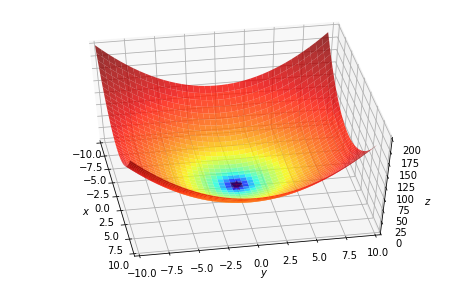

In [210]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

def sphere(x,y):
    return(x**2+y**2)

xmin,xmax = -10,10
x, y = np.meshgrid(np.arange(xmin, xmax, 0.5), np.arange(xmin, xmax, 0.5))
z = sphere(x,y)

minima = np.array([0,0])
minima_ = minima.reshape(-1, 1)

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-10)
ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)

ax.plot(*minima_, sphere(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((xmin, xmax))

plt.show()

In [141]:
sphere(-6,4)

52

In [213]:
def proposeMove(xmin,xmax,ymin,ymax,function):
    x_prime = np.random.uniform(xmin,xmax)
    y_prime = np.random.uniform(ymin,ymax)
    return((x_prime,y_prime,function(x_prime,y_prime)))

           

    

In [221]:
delta = 1
x_min = -10
y_min = 2
f_curr = sphere(x_min,y_min)
f_prop = 1000
res = [[x_min,y_min,f_curr,delta]]
nfev = 0
while(delta > 1e-04):
    x_prop, y_prop, f_prop = proposeMove(xmin,xmax,xmin,xmax,sphere)
    nfev+=1
    if f_prop <= f_curr:
        x_min = x_prop
        y_min = y_prop
        delta = f_curr - f_prop
        f_curr = f_prop
        res.append([x_min,y_min,f_curr,delta])
print("function evaluations: ",nfev)
print("x: ",x_min," y: ",y_min)
    

function evaluations:  6473429
x:  0.0025920836180919338  y:  -0.0008726506570617687


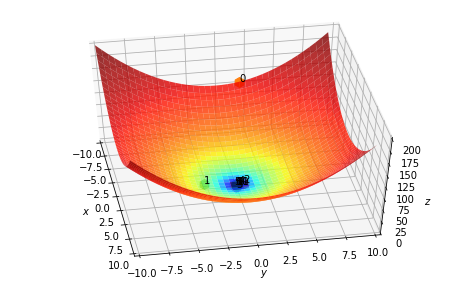

In [222]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-10)
ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)

#ax.plot(*minima_, sphere(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((xmin, xmax))
step=0
for aPoint in res:
    ax.plot([aPoint[0]],[aPoint[1]], [aPoint[2]], 'h', markersize=10)
    #print(aPoint[0], aPoint[1], str(step))
    ax.text(aPoint[0], aPoint[1], aPoint[2], str(step))
    step+=1

plt.show()


Now let's do the same thing using scipy

In [223]:
#from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize

#redefine sphere function to play well with the optimizer
def sphere2(x):
    return(x[0]**2+x[1]**2)

startPt = [-10, 2]
res = minimize(sphere2, x0=startPt, method='Nelder-Mead',
            tol=1e-4, callback=print)
res

[-9.    2.15]
[-8.5    2.025]
[-6.25    2.2625]
[-4.125    2.13125]
[1.4375   2.540625]
[1.4375   2.540625]
[-0.8125    2.303125]
[-0.8125    2.303125]
[-0.8125    2.303125]
[0.6875   2.328125]
[-0.5625    2.040625]
[-0.5625    2.040625]
[-0.8125    1.503125]
[-0.8125    1.503125]
[0.09375   1.0515625]
[0.09375   1.0515625]
[0.0625   0.184375]
[0.0625   0.184375]
[0.0625   0.184375]
[0.0625   0.184375]
[0.0625   0.184375]
[ 0.02941895 -0.13362427]
[-0.10778809  0.05888062]
[0.01165771 0.07350159]
[-0.00932312 -0.03371658]
[-0.00932312 -0.03371658]
[0.01740932 0.02842126]
[-0.02175784 -0.00417072]
[-0.00574869 -0.01079566]
[0.00182803 0.01046904]
[0.00793843 0.00184039]
[-0.00043273 -0.00232047]
[-0.00043273 -0.00232047]
[-0.00043273 -0.00232047]
[-0.00010814  0.00221554]
[-0.00010814  0.00221554]
[ 0.00105713 -0.00030399]
[ 2.08823712e-05 -6.82347508e-04]
[ 2.08823712e-05 -6.82347508e-04]
[-0.00035133  0.00028612]
[2.51042472e-05 3.31537077e-04]
[-7.11153944e-05 -1.86758533e-04]
[ 1.41

 final_simplex: (array([[-5.47697556e-06, -1.41911455e-05],
       [ 6.19398987e-06,  4.77076288e-05],
       [-4.25962122e-05,  4.42956172e-05]]), array([2.31385871e-10, 2.31438336e-09, 3.77653900e-09]))
           fun: 2.313858714219231e-10
       message: 'Optimization terminated successfully.'
          nfev: 94
           nit: 49
        status: 0
       success: True
             x: array([-5.47697556e-06, -1.41911455e-05])